# Building Machine Learning Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ml_new')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies
0,1077501,1296599.0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,...,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-09-01,744.0,740.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,2013-04-01,119.66,2016-09-01,499.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,...,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-09-01,719.0,715.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,604.0,600.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,...,1055.27,0.00,0.00,0.00,2016-09-01,67.79,2016-09-01,694.0,690.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42350 entries, 0 to 42349
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       42350 non-null  int64  
 1   member_id                42350 non-null  float64
 2   loan_amnt                42350 non-null  float64
 3   funded_amnt              42350 non-null  float64
 4   funded_amnt_inv          42350 non-null  float64
 5   term                     42350 non-null  int64  
 6   int_rate                 42350 non-null  float64
 7   installment              42350 non-null  float64
 8   grade                    42350 non-null  object 
 9   sub_grade                42350 non-null  object 
 10  emp_title                42350 non-null  object 
 11  emp_length               42350 non-null  object 
 12  home_ownership           42350 non-null  object 
 13  annual_inc               42350 non-null  float64
 14  verification_status   

# Data Preparation


In [5]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low', 'pub_rec_bankruptcies'],
      dtype='object')

In [6]:
col_drop=['id','member_id','funded_amnt','funded_amnt_inv','sub_grade','emp_title','issue_d','zip_code',
          'out_prncp','out_prncp_inv', 'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
          'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',]

In [7]:
df.drop(columns=col_drop,axis=1,inplace=True)

In [8]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'pub_rec_bankruptcies'],
      dtype='object')

In [9]:
df['title'].value_counts()

Debt Consolidation         2255
Debt Consolidation Loan    1755
Personal Loan               706
Consolidation               545
debt consolidation          532
                           ... 
Health and well being         1
AB Consolidation Loan         1
My Debt Conso Loan            1
GM card re-fi                 1
VISA                          1
Name: title, Length: 21173, dtype: int64

In [10]:
df['addr_state'].value_counts()

CA    7398
NY    4045
FL    3093
TX    2896
NJ    1976
IL    1667
PA    1643
GA    1500
VA    1481
MA    1432
OH    1321
MD    1118
AZ     928
WA     886
CO     854
NC     827
CT     812
MI     794
MO     759
MN     648
NV     526
WI     514
SC     489
AL     482
OR     467
LA     460
KY     356
OK     316
KS     296
UT     278
AR     260
DC     222
RI     208
NM     205
NH     188
WV     186
HI     180
DE     135
MT      96
WY      87
AK      86
SD      66
VT      57
TN      32
MS      26
IN      19
IA      12
NE      11
ID       9
ME       3
Name: addr_state, dtype: int64

In [11]:
col_drop=['title','addr_state']
df.drop(columns=col_drop,axis=1,inplace=True)

In [12]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'pub_rec_bankruptcies'],
      dtype='object')

**Checking FICO Score Columns**

In [13]:
df['fico_range_high'].unique()

array([739., 744., 694., 699., 734., 664., 679., 729., 714., 709., 724.,
       669., 674., 764., 689., 759., 684., 704., 794., 754., 719., 769.,
       749., 774., 784., 779., 799., 814., 804., 819., 789., 809., 829.,
       824., 634., 629., 654., 659., 649., 644., 639., 614., 624., 619.])

In [14]:
df['fico_range_low'].unique()

array([735., 740., 690., 695., 730., 660., 675., 725., 710., 705., 720.,
       665., 670., 760., 685., 755., 680., 700., 790., 750., 715., 765.,
       745., 770., 780., 775., 795., 810., 800., 815., 785., 805., 825.,
       820., 630., 625., 650., 655., 645., 640., 635., 610., 620., 615.])

<Figure size 720x576 with 0 Axes>

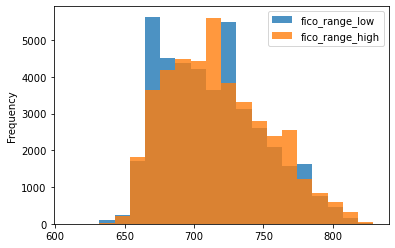

In [15]:
plt.figure(figsize=(10,8))
df[['fico_range_low','fico_range_high']].plot.hist(alpha=0.8, bins=20)
plt.show()

In [16]:
#FICO Score Average
df['fico_range_avg']=(df['fico_range_low']+df['fico_range_high'])/2

In [17]:
df[['fico_range_low','fico_range_high','fico_range_avg']].sample(10)

,fico_range_low,fico_range_high,fico_range_avg
25097,785.0,789.0,787.0
19406,685.0,689.0,687.0
39394,745.0,749.0,747.0
37506,765.0,769.0,767.0
32271,735.0,739.0,737.0
39181,685.0,689.0,687.0
9222,720.0,724.0,722.0
2060,710.0,714.0,712.0
32449,705.0,709.0,707.0
4848,785.0,789.0,787.0


In [18]:
df.drop(columns=['fico_range_low','fico_range_high','last_fico_range_high','last_fico_range_low'],axis=1, inplace=True)

In [19]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'fico_range_avg'],
      dtype='object')

In [20]:
df.describe()

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_range_avg
count,42350.000000,42350.000000,42350.000000,42350.000000,4.235000e+04,42350.000000,42350.000000,42350.000000,42350.000000,42350.000000,4.235000e+04,42350.000000,42350.000000,42350.000000,42350.000000
mean,11109.211924,42.220165,12.158697,323.124979,6.920405e+04,13.383605,0.152326,1.079646,9.355089,0.058135,1.433006e+04,49.117218,22.152798,0.043778,715.092916
std,7409.408311,10.516469,3.707855,208.872033,6.413285e+04,6.723341,0.511880,1.526551,4.493806,0.245716,2.198694e+04,28.360825,11.585441,0.205525,36.189896
min,500.000000,36.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,612.000000
25%,5200.000000,36.000000,9.620000,165.740000,4.000000e+04,8.210000,0.000000,0.000000,6.000000,0.000000,3.670000e+03,25.700000,13.000000,0.000000,687.000000
50%,9800.000000,36.000000,11.990000,278.410000,5.900000e+04,13.480000,0.000000,1.000000,9.000000,0.000000,8.858000e+03,49.700000,20.000000,0.000000,712.000000
75%,15000.000000,60.000000,14.720000,428.907500,8.250000e+04,18.690000,0.000000,2.000000,12.000000,0.000000,1.728375e+04,72.700000,29.000000,0.000000,742.000000
max,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,47.000000,5.000000,1.207359e+06,119.000000,90.000000,2.000000,827.000000


In [21]:
col_drop=['earliest_cr_line','open_acc','pub_rec','total_acc','last_credit_pull_d','pub_rec_bankruptcies']
df.drop(columns=col_drop,axis=1,inplace=True)

In [22]:
df['loan_status'].value_counts()

Fully Paid                                             33542
Charged Off                                             5567
Does not meet the credit policy. Status:Fully Paid      1952
Does not meet the credit policy. Status:Charged Off      742
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [23]:
df = df[(df['loan_status']=='Fully Paid') | (df['loan_status']=='Charged Off')]

In [24]:
df.reset_index(drop=True, inplace=True)

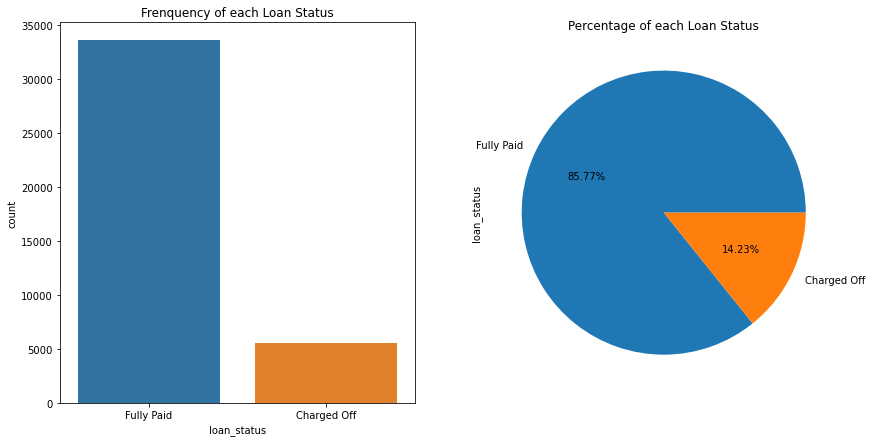

In [25]:
fig, ax = plt.subplots(1,2, figsize=(14,7))
sns.countplot(x='loan_status', data=df, ax=ax[0])
ax[0].set_title('Frenquency of each Loan Status')
df['loan_status'].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.2f%%')
ax[1].set_title('Percentage of each Loan Status')
plt.show()

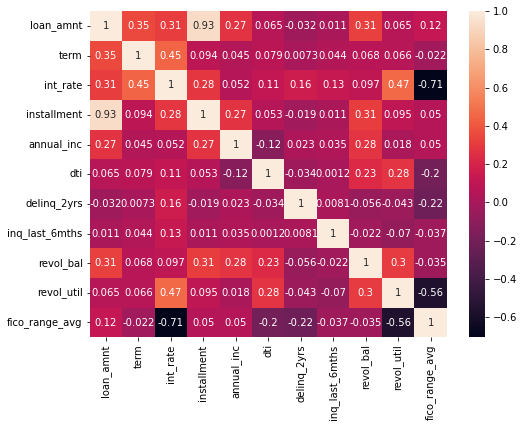

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Target Variable**

In [27]:
x_df = df.drop(columns=['loan_status'], axis=1)
y_df = df['loan_status']

# Encode Categorical Columns

In [28]:
cat_var=[]
for i in x_df.columns:
    if x_df[i].dtype=='object':
        print(i)
        cat_var.append(i)

grade
emp_length
home_ownership
verification_status
purpose


In [29]:
for x in cat_var:
    cat_list='var_'+x
    cat_list=pd.get_dummies(x_df[x],prefix=x)
    df1=x_df.join(cat_list)
    x_df=df1

In [30]:
x_df.shape

(39109, 56)

In [31]:
x_df.sample()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
32224,20000.0,36,11.83,662.68,B,5 years,MORTGAGE,105000.0,Not Verified,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [32]:
x_df.drop(columns=cat_var,axis=1,inplace=True)

In [33]:
x_df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,revol_bal,revol_util,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,36,10.65,162.87,24000.0,27.65,0.0,1.0,13648.0,83.7,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,60,15.27,59.83,30000.0,1.00,0.0,5.0,1687.0,9.4,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,36,15.96,84.33,12252.0,8.72,0.0,2.0,2956.0,98.5,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,36,13.49,339.31,49200.0,20.00,0.0,1.0,5598.0,21.0,...,0,0,0,0,0,1,0,0,0,0
4,5000.0,36,7.90,156.46,36000.0,11.20,0.0,3.0,7963.0,28.3,...,0,0,0,0,0,0,0,0,0,1


# Training & Testing Data

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x_df, y_df, test_size=0.30)

In [60]:
x_train.shape

(27376, 51)

In [61]:
x_test.shape

(11733, 51)

In [62]:
y_train.shape

(27376,)

In [63]:
y_test.shape

(11733,)

In [64]:
x_train.sample(5)

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,revol_bal,revol_util,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
28977,3200.0,36,13.85,109.14,96000.0,0.31,0.0,0.0,255.0,9.1,...,0,0,1,0,0,0,0,0,0,0
858,9600.0,36,14.65,331.15,40000.0,5.20,0.0,1.0,5271.0,75.3,...,0,0,0,0,0,0,0,0,0,0
18972,10500.0,36,7.29,325.61,35220.0,14.07,0.0,1.0,10950.0,51.2,...,0,0,1,0,0,0,0,0,0,0
676,3000.0,36,7.90,93.88,45000.0,19.39,0.0,0.0,16487.0,63.2,...,0,0,0,0,0,0,0,0,0,0
9274,16000.0,60,17.99,406.21,40000.0,13.53,0.0,2.0,13854.0,45.6,...,1,0,0,0,0,0,0,0,0,0


In [65]:
y_train.sample(5)

6521      Fully Paid
5255      Fully Paid
6265      Fully Paid
29284    Charged Off
18088     Fully Paid
Name: loan_status, dtype: object

**Logistic Regression**

In [66]:
log_reg=LogisticRegression(max_iter=1000)

In [67]:
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [68]:
y_pred=log_reg.predict(x_test)

# Training Accuracy Score

In [69]:
print('Accuracy is',log_reg.score(x_train,y_train))

Accuracy is 0.8581969608416131


# Testing  Accuracy Score

In [70]:
print('Accuracy is',log_reg.score(x_test,y_test))

Accuracy is 0.8563879655672036
